# Import necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# Load and Prepare the Mushroom Dataset

In [5]:
dataset_link = "https://raw.githubusercontent.com/massudavide/Mushroom-Dataset/refs/heads/master/mushroom_data_all.csv"
try:
    df = pd.read_csv(dataset_link)
    print("Mushroom dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'mushrooms.csv' not found. Please update the file path.")

Mushroom dataset loaded successfully!


# Exploratory Data Analysis (EDA) & Preprocessing

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


There are no missing values in the dataset.

In [7]:
# checking for values in each column/feature
for col in df.columns:
    print(col,":",df[col].unique())

class_edible : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Observations:
1.   It can be seen that `stalk-root` has a value `?`, it seems like a placeholder for missing data.
2.    `veil-type` has only one value, therefoe it provides no predictive information. It is reasonable to drop this column.

In [8]:
# Count the number of '?' in 'stalk-root'
print(f"\nNumber of '?' in 'stalk-root': {df['stalk-root'].value_counts()['?']}")
print(f"Percentage of '?' in 'stalk-root': {df['stalk-root'].value_counts()['?']/len(df['stalk-root'])*100:.2f}%")


Number of '?' in 'stalk-root': 2480
Percentage of '?' in 'stalk-root': 30.53%


Since `stalk-root` has only 30.53% of missing data, I will replace `?` with the most frequent value (mode) in this feature.

Note: If more than 50% of the data would have been missing from `stalk-root`, we could have dropped this column as well.

In [9]:
# I am going to replace '?' with the mode (most frequent item) of the column.
stalk_root_mode = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', stalk_root_mode)

In [10]:
# Checking the unique values in 'stalk-root' column after replacing '?'
print("\nUnique values in 'stalk-root' column after replacing '?':")
print(df['stalk-root'].unique())


Unique values in 'stalk-root' column after replacing '?':
['e' 'c' 'b' 'r']


In [11]:
# Drop 'veil-type' as it has only one value and provides no predictive information.
df.drop('veil-type', axis=1, inplace=True)
print("'veil-type' column has been dropped.")

'veil-type' column has been dropped.


### Preprocessing: Label Encoding

In [12]:
# Convert categorical features into numerical format.
encoded_df = df.copy()
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

print("\nAll categorical features have been encoded.")
X = encoded_df.drop('class_edible', axis=1)
y = encoded_df['class_edible']


All categorical features have been encoded.


### Split data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData has been split into training and testing sets.")


Data has been split into training and testing sets.


# Model Training and Evaluation

In [14]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy (All Features): {accuracy_log * 100:.2f}%")

# Support Vector Machine (SVM)
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (All Features): {accuracy_svm * 100:.2f}%")

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy (All Features): {accuracy_tree * 100:.2f}%")

Logistic Regression Accuracy (All Features): 95.24%
SVM Accuracy (All Features): 96.64%
Decision Tree Accuracy (All Features): 100.00%


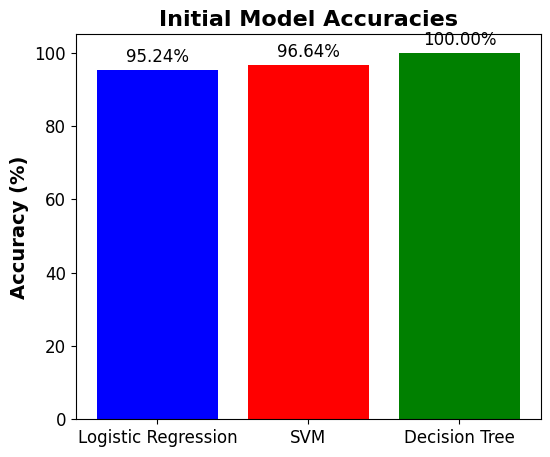

In [15]:
# Accuracy Visualization

def plot_accuracy_bars(LR_accuracy: float, SVM_accuracy: float, DT_accuracy: float, fig_title: str='Model Accuracies'):
    models = ['Logistic Regression', 'SVM', 'Decision Tree']
    accuracies = [LR_accuracy*100, SVM_accuracy*100, DT_accuracy*100]
    colors = ['blue', 'red', 'green']

    plt.figure(figsize=(6, 5))
    bars = plt.bar(models, accuracies, color=colors)

    plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
    plt.title(fig_title, fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add accuracy labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

    plt.show()
figure_title = "Initial Model Accuracies"
plot_accuracy_bars(accuracy_log, accuracy_svm, accuracy_tree, figure_title)

# Feature Extraction

In [16]:
print("Feature Extraction using Decision Tree Importances")

# Getting feature importances from the trained Decision Tree
importances = tree_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head(10))

Feature Extraction using Decision Tree Importances

Top 5 Most Important Features:
                   Feature  Importance
8               gill-color    0.343022
18       spore-print-color    0.210956
19              population    0.184893
7                gill-size    0.110130
4                     odor    0.042647
3                  bruises    0.027663
20                 habitat    0.027062
9              stalk-shape    0.022083
14  stalk-color-below-ring    0.019649
10              stalk-root    0.007639


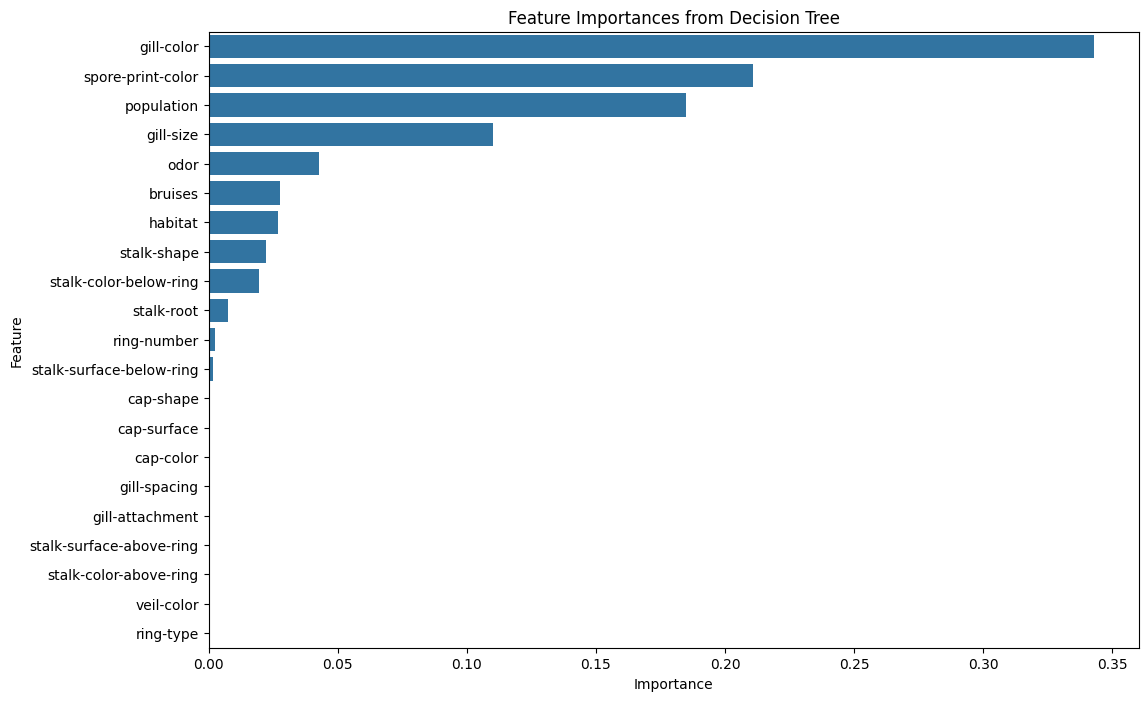

In [17]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Decision Tree')
plt.show()

In [18]:
# Select features with importance greater than a small threshold (e.g., 0.01)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01][['Feature', 'Importance']]
print(f"\nSelected {len(important_features)} important features: {important_features}")


Selected 9 important features:                    Feature  Importance
8               gill-color    0.343022
18       spore-print-color    0.210956
19              population    0.184893
7                gill-size    0.110130
4                     odor    0.042647
3                  bruises    0.027663
20                 habitat    0.027062
9              stalk-shape    0.022083
14  stalk-color-below-ring    0.019649


/tmp/ipython-input-19-3039556096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=important_features, palette='viridis')


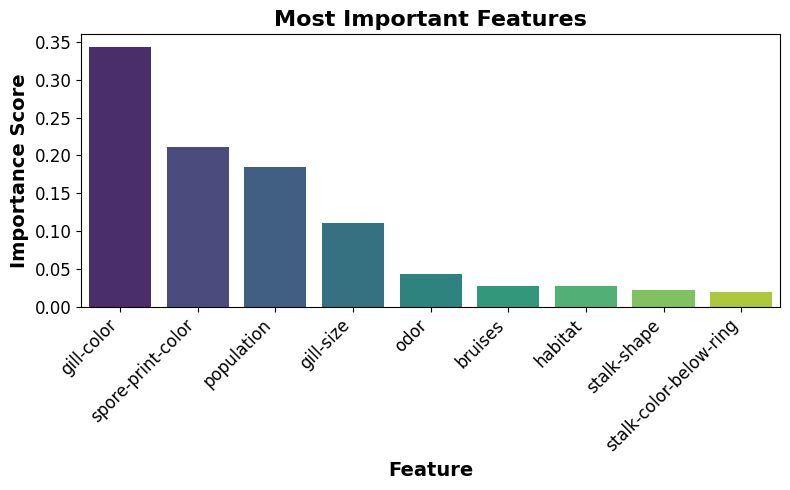

In [19]:
# Plotting the most important features

plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Importance', data=important_features, palette='viridis')
plt.title('Most Important Features', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14, fontweight='bold')
plt.ylabel('Importance Score', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotated the labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Train Test Split: Creatig new training and testing sets with only the important features

In [22]:
# Creating new training and testing sets with only the important features
X_important = X[important_features['Feature']]
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y, test_size=0.3, random_state=42)
print("\nCreated new training/testing sets with extracted features.")


Created new training/testing sets with extracted features.


# Model Retraining on Extracted Features

In [23]:
print("Model Retraining on Extracted Features\n ")

# Logistic Regression
log_reg_imp = LogisticRegression(max_iter=1000, random_state=42)
log_reg_imp.fit(X_train_imp, y_train_imp)
y_pred_log_imp = log_reg_imp.predict(X_test_imp)
accuracy_log_imp = accuracy_score(y_test_imp, y_pred_log_imp)
print(f"Logistic Regression Accuracy (Extracted Features): {accuracy_log_imp * 100:.2f}%")

# Support Vector Machine (SVM)
svm_clf_imp = SVC(kernel='linear', random_state=42)
svm_clf_imp.fit(X_train_imp, y_train_imp)
y_pred_svm_imp = svm_clf_imp.predict(X_test_imp)
accuracy_svm_imp = accuracy_score(y_test_imp, y_pred_svm_imp)
print(f"SVM Accuracy (Extracted Features): {accuracy_svm_imp * 100:.2f}%")

# Decision Tree
tree_clf_imp = DecisionTreeClassifier(random_state=42)
tree_clf_imp.fit(X_train_imp, y_train_imp)
y_pred_tree_imp = tree_clf_imp.predict(X_test_imp)
accuracy_tree_imp = accuracy_score(y_test_imp, y_pred_tree_imp)
print(f"Decision Tree Accuracy (Extracted Features): {accuracy_tree_imp * 100:.2f}%")

Model Retraining on Extracted Features
 
Logistic Regression Accuracy (Extracted Features): 89.83%
SVM Accuracy (Extracted Features): 91.14%
Decision Tree Accuracy (Extracted Features): 100.00%


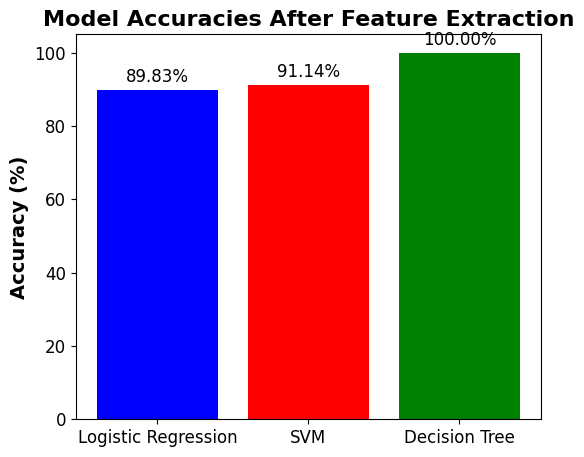

In [24]:
# Accuracy Visualization After Model Retraining
figure_title = 'Model Accuracies After Feature Extraction'
plot_accuracy_bars(accuracy_log_imp, accuracy_svm_imp, accuracy_tree_imp, figure_title)

**Conclusion**: The Decision Tree still performs perfectly even with a reduced feature set.